In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-prediction/medical-charges.csv


In [2]:
medical_df = pd.read_csv('/kaggle/input/health-insurance-prediction/medical-charges.csv')


In [3]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
medical_df.age.describe()


count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

# Analysis and Visualization

In [8]:
fig = px.histogram(medical_df, 
                   x='age',
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
medical_df.smoker.value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

# smoker count

In [10]:
fig = px.histogram(medical_df, 
                   x='smoker',
                   marginal='box',
                   color='sex',
                   title='smoker')
fig.update_layout(bargap=0.1)
fig.show()

# Age vs. Charges vs smoker

In [11]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges vs smoker')
fig.update_traces(marker_size=5)
fig.show()

# bmi vs charges

In [12]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='bmi vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

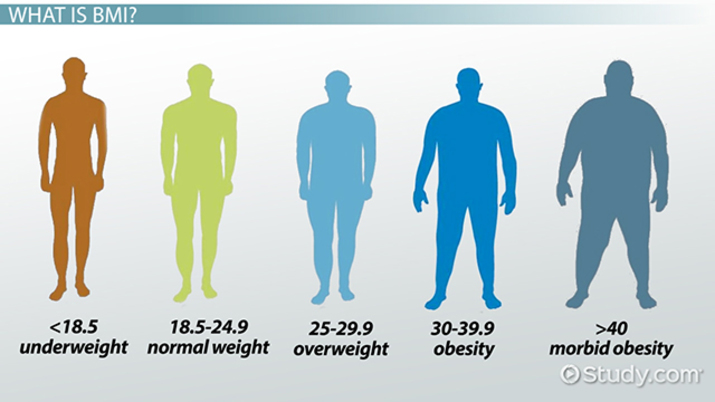

# region vs. Charges

In [13]:
fig = px.violin(medical_df, 
                 x='region', 
                 y='charges', 
                 color='smoker',
                 title='region vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

# children vs. Charges

In [14]:
fig = px.violin(medical_df, 
                 x='children', 
                 y='charges', 
                 color='smoker',
                 title='children vs. Charges')

fig.show()

# correlation matrix

In [15]:
medical_df.charges.corr(medical_df.age)


0.2990081933306476

In [16]:
medical_df.charges.corr(medical_df.bmi)


0.19834096883362895

In [17]:
medical_df.charges.corr(medical_df.children)


0.06799822684790478

In [18]:
medical_df_copy=medical_df.copy()

In [19]:
smoker_values = {'no': 0, 'yes': 1}
medical_df_copy['smoker_numeric'] = medical_df_copy['smoker'].map(smoker_values)
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [20]:
numeric_columns = medical_df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


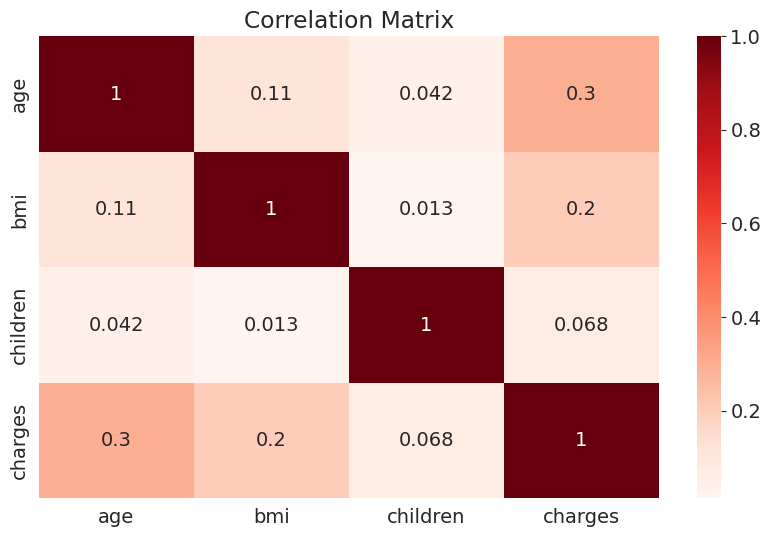

In [21]:
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)
plt.title('Correlation Matrix');

# age vs charges ( non smoker )


In [22]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

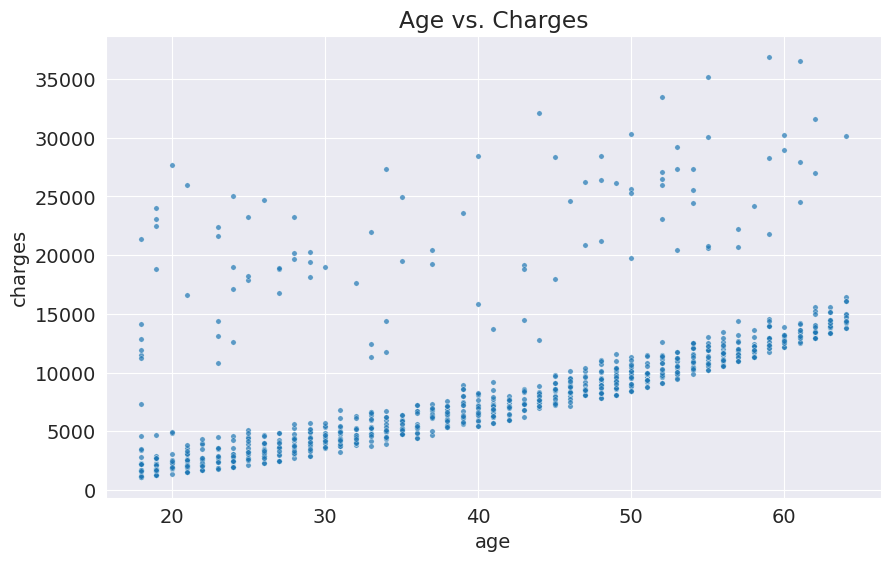

In [23]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, 
                x='age', 
                y='charges', 
                alpha=.7, 
                s=15);

# Loss/Cost Function


In [24]:
!pip install numpy --quiet
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [25]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = w * ages + b
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    
    loss = rmse(target, estimated_charges)
    print("RMSE Loss: ", loss)

RMSE Loss:  8044.90886266932


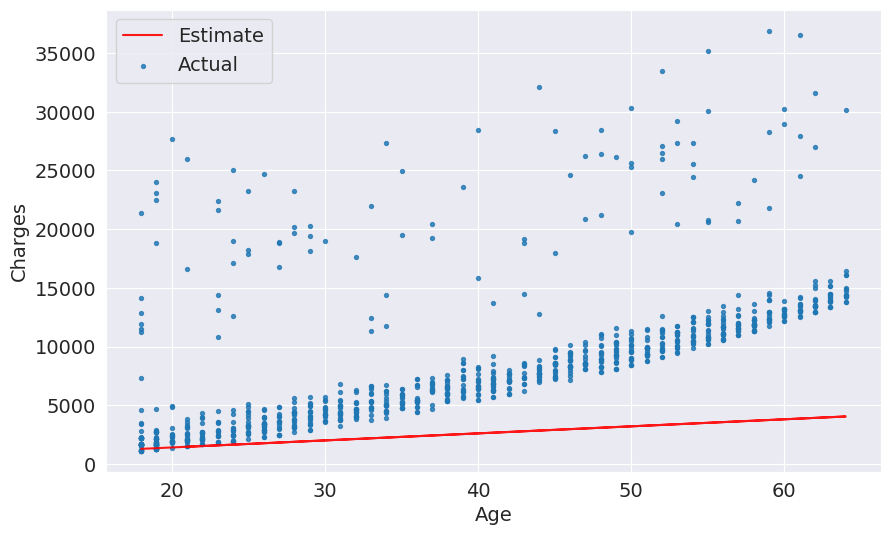

In [26]:
try_parameters(60, 200)


# Linear Regression using Scikit-learn


In [27]:
!pip install scikit-learn --quiet


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)
model.fit(inputs, targets)

inputs.shape : (1064, 1)
targes.shape : (1064,)


LinearRegression()

In [31]:
predictions = model.predict(inputs)

In [32]:
rmse(targets, predictions)

4662.505766636395

In [33]:
# w
model.coef_

array([267.24891283])

In [34]:
# b
model.intercept_

-2091.4205565650864

RMSE Loss:  4662.505766636395


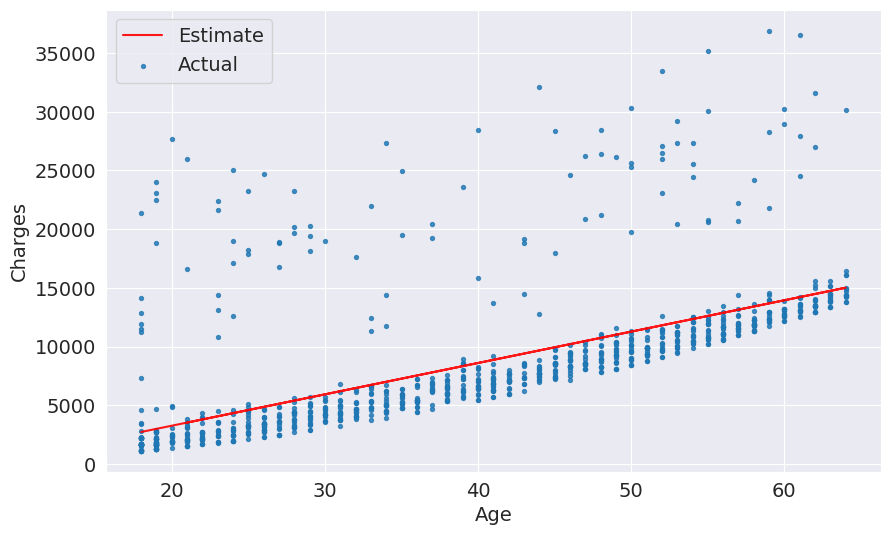

In [35]:
try_parameters(model.coef_, model.intercept_)


# CHAREGES PREDICTION FOR SMOKER 


In [36]:
smoker_df= medical_df[medical_df.smoker=='yes']


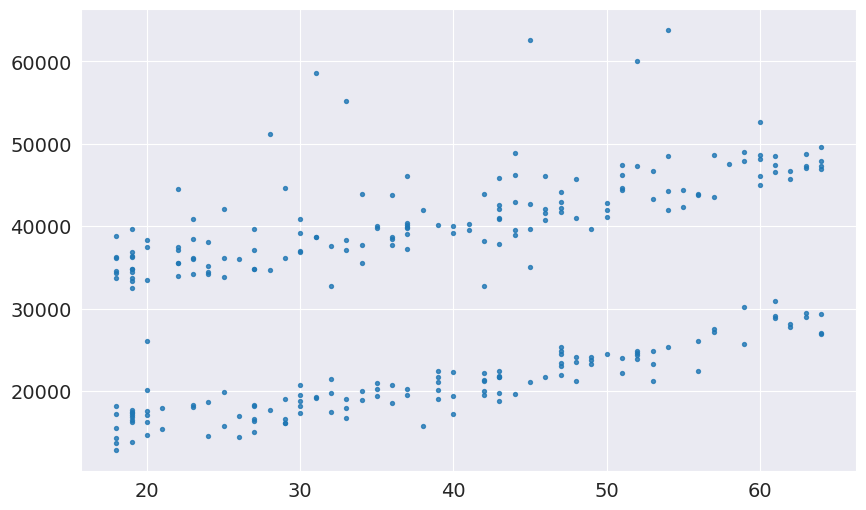

In [37]:
plt.scatter(smoker_df.age,smoker_df.charges, s=8,alpha=0.8,);


# bmi vs charges for smoker

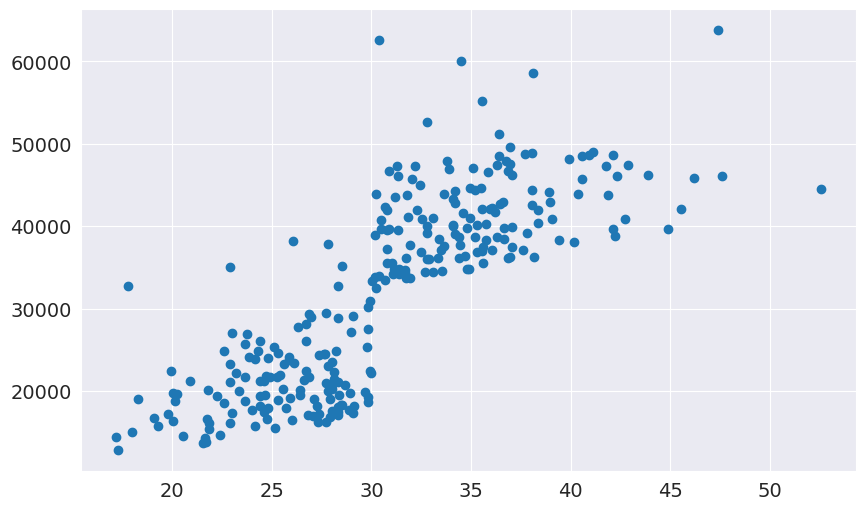

In [38]:
plt.scatter(smoker_df.bmi,smoker_df.charges)


In [39]:
bmi_l30_df = smoker_df[smoker_df.bmi<30]
bmi_g30_df = smoker_df[smoker_df.bmi>30]

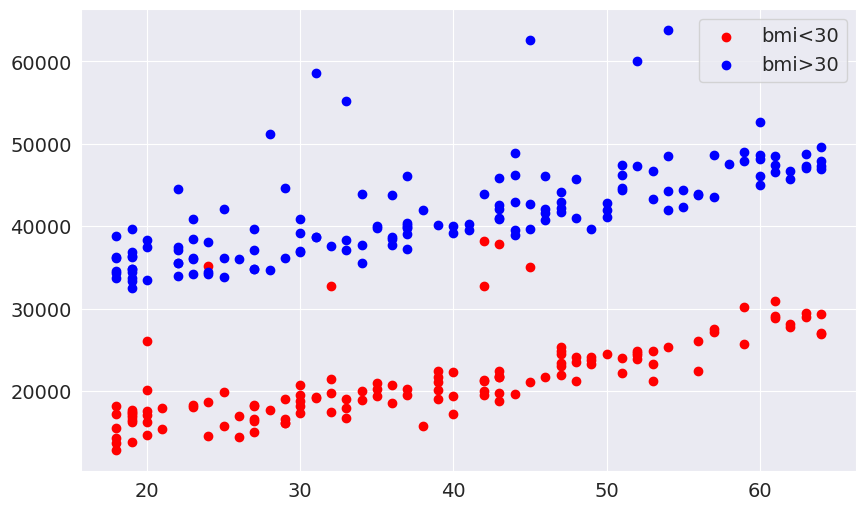

In [40]:
plt.scatter(bmi_l30_df.age,bmi_l30_df.charges, c='r')
plt.scatter(bmi_g30_df.age,bmi_g30_df.charges, c='b')
plt.legend(['bmi<30', 'bmi>30']);

In [41]:
inputs_bmi_g30 = bmi_g30_df[['age']]
target_bmi_g30 = bmi_g30_df.charges
inputs_bmi_l30 = bmi_l30_df[['age']]
target_bmi_l30 = bmi_l30_df.charges

model_smoker_g30 = LinearRegression()
model_smoker_l30 = LinearRegression()

model_smoker_g30.fit(inputs_bmi_g30,target_bmi_g30)
model_smoker_l30.fit(inputs_bmi_l30,target_bmi_l30)

LinearRegression()

RMSE Loss bmi<30:  3633.1639889801854
RMSE Loss bmi>30:  4162.163430167338


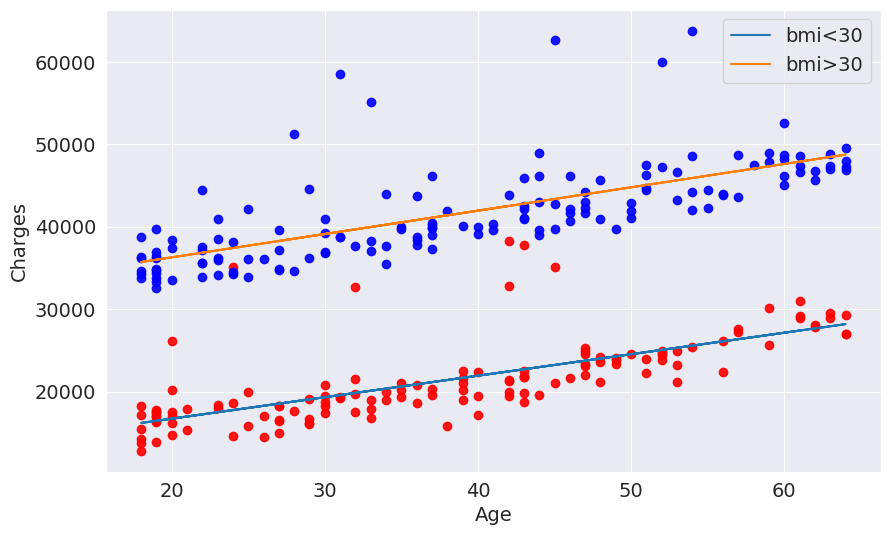

In [42]:
    w1= model_smoker_l30.coef_
    w2= model_smoker_g30.coef_

    b1=model_smoker_l30.intercept_
    b2=model_smoker_g30.intercept_


    estimated_charges1 = w1 * bmi_l30_df.age + b1
    estimated_charges2 = w2 * bmi_g30_df.age + b2

    
    plt.plot(bmi_l30_df.age,estimated_charges1 )
    plt.plot(bmi_g30_df.age,estimated_charges2 )

    plt.scatter(bmi_l30_df.age, bmi_l30_df.charges, c='r', alpha=0.9);
    plt.scatter(bmi_g30_df.age, bmi_g30_df.charges, c='b', alpha=0.9);

    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['bmi<30', 'bmi>30']);
    
    loss1 = rmse(bmi_l30_df.charges, estimated_charges1)
    loss2 = rmse(bmi_g30_df.charges, estimated_charges2)

    print("RMSE Loss bmi<30: ", loss1)
    print("RMSE Loss bmi>30: ", loss2)


# RMSE comparision
for non-smoker rmse 4662.5
for smoker rmse 3633.16 bmi>30
for smoker rmse 4162.16 bmi<30


# Linear Regression using Multiple Features non-smoker


$charges = w_1 \times age + w_2 \times bmi + b$



In [43]:
non_smoker_df.charges.corr(non_smoker_df.bmi)


0.0840365431283327

In [44]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [45]:
model.coef_, model.intercept_


(array([266.87657817,   7.07547666]), -2293.6320906488727)

adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [46]:
non_smoker_df.charges.corr(non_smoker_df.children)


0.13892870453542192

# "children" correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [47]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [48]:
non_smoker_df.charges.corr(non_smoker_df.children)


0.13892870453542192

In [49]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [50]:
model.coef_, model.intercept_


(array([265.2938443 ,   5.27956313, 580.65965053]), -2809.2976032235892)

# medical charges for all customers smoker+nonsmoker

In [51]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


RSME Loss: 11355.317901125973

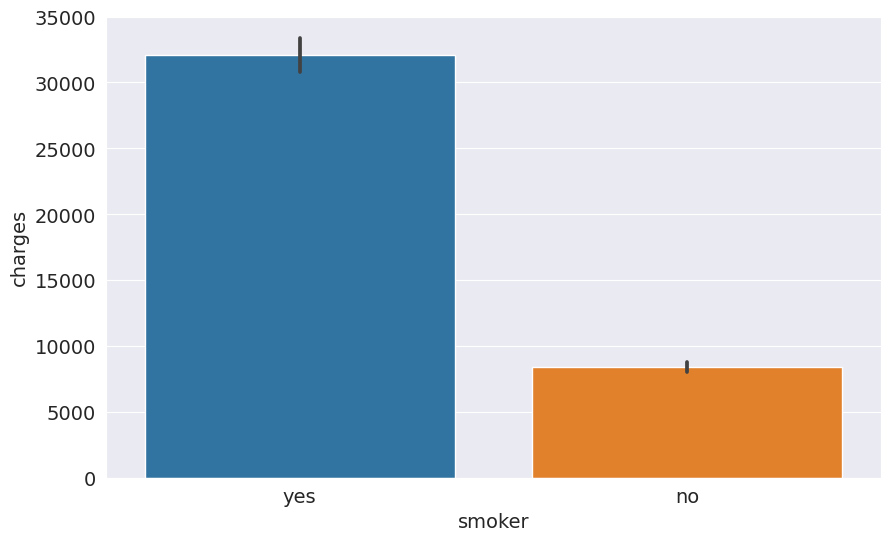

In [52]:
sns.barplot(data=medical_df, x='smoker', y='charges');


In [53]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [54]:
medical_df.charges.corr(medical_df.smoker_code)


0.787251430498478


$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [55]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


In [56]:
model.coef_, model.intercept_


(array([  257.84950728,   321.85140247,   473.50231561, 23811.3998446 ]),
 -12102.7693627279)

In [57]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [58]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


In [59]:
model.coef_, model.intercept_


(array([  257.73498767,   322.36421449,   474.41112061, 23823.39253065,
         -128.63985357]),
 -12052.461985664737)

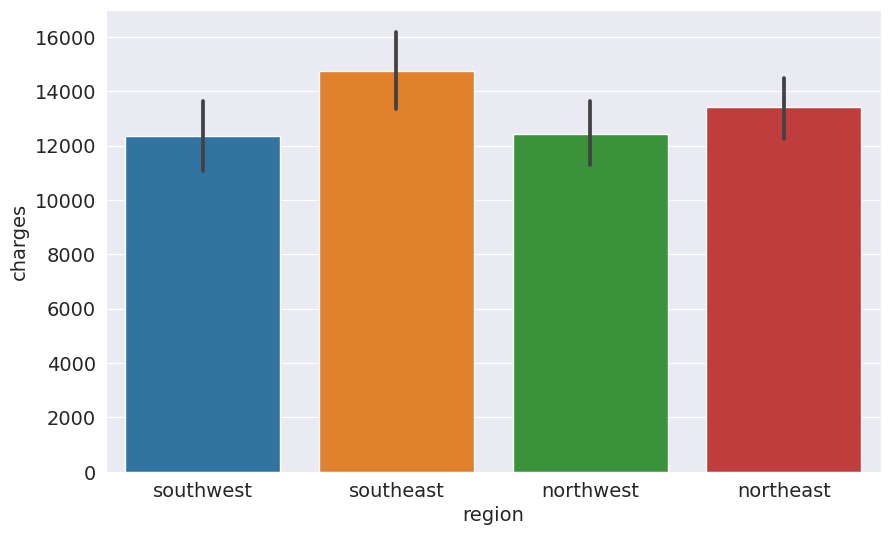

In [60]:
sns.barplot(data=medical_df, x='region', y='charges');


In [61]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [62]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [63]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df


,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0



$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [64]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [65]:
model.coef_, model.intercept_


(array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 -12525.547811195444)

# charges for smoker bmi>30 including all parameter 

In [66]:
smoker_df=medical_df[(medical_df.smoker == 'yes') & (medical_df.bmi >30)]
#smoker_df=smoker_df[smoker_df.bmi>=30]

In [67]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = smoker_df[input_cols], smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 3547.383565415611


## RMSE: 3547.383565415611


# charges for smoker bmi<=30 including all parameter 

In [68]:
smoker_df=medical_df[(medical_df.smoker == 'yes') & (medical_df.bmi <=30)]


In [69]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = smoker_df[input_cols], smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 3375.06086626269


## RMSE: 3375.06086626269


# charges for non-smoker including all parameter 

In [70]:
nonsmoker_df=medical_df[ medical_df.smoker == 'no']


In [71]:
nonsmoker_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0,0,0.0,0.0,0.0,1.0
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0


In [72]:
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = nonsmoker_df[input_cols], nonsmoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4573.074988795492


# CONCLUSION

FOR CHARGES WE CAN PREDICT IN 3 CATEGORIES
1. NON SMOKER         ( RMSE = 4573.074988795492 )
2. SMOKER BMI<=30      ( RMSE = 3375.06086626269 )
3. SMOKER BMI>30      ( RMSE = 3547.383565415611 )